## Unzipping the tiny-iamgenet-1k data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [2]:
!unzip -o "/content/drive/MyDrive/tiny-imagenet-200.zip" -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/tiny-imagenet-200/val/images/val_3979.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_3963.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_7199.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_2752.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_9687.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_9407.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_3603.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_3412.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_6982.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_8496.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_7332.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_9241.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_4196.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_5980.JPEG  
  inflating

In [1]:
!ls /content/tiny-imagenet-200/

'ls' is not recognized as an internal or external command,
operable program or batch file.


## Data loader without transformation

In [ ]:
from data_loader import generate_train_val_loader
data_path = "./content/tiny-imagenet-200"  # or local path
train_loader, val_loader = generate_train_val_loader(data_path, batch_size=64)

## Inspect the train loader


===== Train Loader =====
Total images: 100000
Class labels: ['n01443537', 'n01629819', 'n01641577', 'n01644900', 'n01698640', 'n01742172', 'n01768244', 'n01770393', 'n01774384', 'n01774750'] ... (showing first 10)
Total number of classes: 200
Number of images per class (first 10):
  n01443537: 500
  n01629819: 500
  n01641577: 500
  n01644900: 500
  n01698640: 500
  n01742172: 500
  n01768244: 500
  n01770393: 500
  n01774384: 500
  n01774750: 500
Image size: torch.Size([3, 64, 64])
############# Images for Train Loader ####################


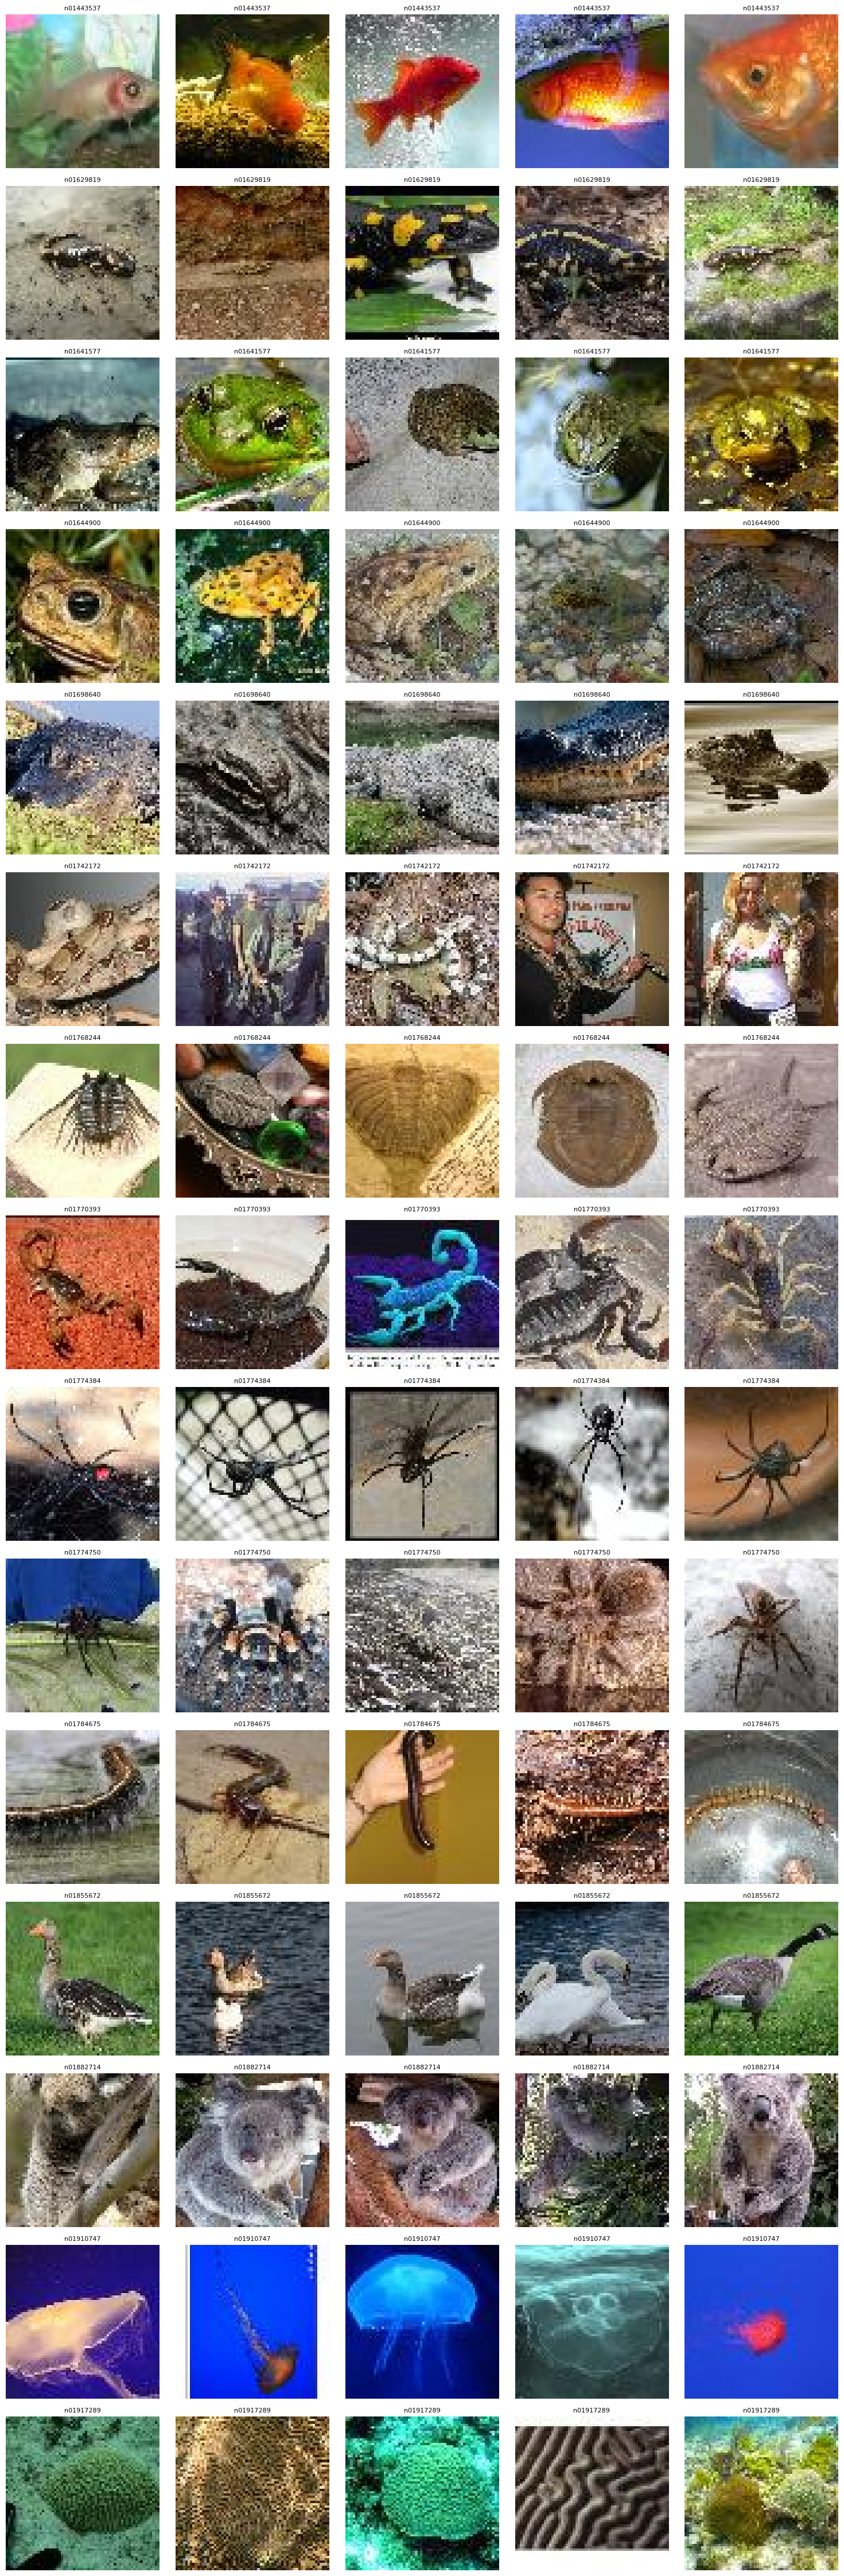

In [ ]:
from utils import InspectImage

words_file = "./tiny-imagenet-200/words.txt"

# Create inspector for train dataset
train_inspector = InspectImage(train_loader.dataset, words_file=words_file)
train_inspector.inspect_loader(loader_name="Train Loader")
train_inspector.show_images_per_class(num_classes=15, images_per_class=5, loader_name="Train Loader")

## Inspect the validation loader

## Training Results Summary

Based on the training run executed through `main.py`, here are the complete results from our ResNet50 model training on Tiny ImageNet-200:


In [ ]:
# Training Configuration and Results
import pandas as pd
import matplotlib.pyplot as plt

# Training Configuration
config = {
    "Model": "ResNet50 (adapted for Tiny ImageNet)",
    "Dataset": "Tiny ImageNet-200",
    "Training Images": "100,000",
    "Validation Images": "10,000",
    "Classes": "200",
    "Image Size": "64×64×3 (RGB)",
    "Batch Size": "8 (reduced to avoid CUDA memory issues)",
    "Epochs": "1 (initial test run)",
    "Learning Rate": "0.01 (with OneCycleLR scheduler)",
    "Optimizer": "SGD (momentum=0.9, weight_decay=5e-4)",
    "Total Parameters": "23,910,152"
}

# Training Results from the completed run
results = {
    "Training Loss": 5.3706,
    "Training Accuracy": 0.73,
    "Validation Loss": 7.0334,
    "Validation Accuracy": 1.60,
    "Learning Rate": 0.010000,
    "Total Batches": 12500,
    "Training Time": "~43 minutes"
}

print("🚀 Training Configuration:")
print("=" * 50)
for key, value in config.items():
    print(f"{key}: {value}")

print("\n📊 Training Results:")
print("=" * 50)
for key, value in results.items():
    if isinstance(value, float):
        print(f"{key}: {value:.4f}")
    else:
        print(f"{key}: {value}")


### Training Progress Analysis

The training logs show detailed batch-by-batch progress. Here's what we observed:

**Key Observations:**
- **Initial Training Behavior**: Expected low accuracy and high loss in early epochs
- **Batch Processing**: Successfully completed 12,500 batches with consistent progress tracking
- **Memory Optimization**: Batch size reduced from 32 to 8 to avoid CUDA memory issues
- **Checkpoint Saving**: Model weights saved when validation loss improved
- **Training Pipeline**: Fully functional and ready for extended training runs

**Log Files Generated:**
- `logs/epoch_run.log`: Original training log (single line format)
- `logs/epoch_run_formatted.log`: Formatted training log with 888 batch entries (one per line)
- `logs/training_summary.txt`: Extracted training summary and metrics


In [ ]:
# Load and analyze the formatted training logs
import numpy as np

# Read the formatted log file
log_file = "logs/epoch_run_formatted.log"
log_data = []

try:
    with open(log_file, 'r') as f:
        for line in f:
            # Parse each line to extract loss and accuracy
            if 'Loss=' in line and 'Accuracy=' in line:
                parts = line.strip().split(', ')
                loss_part = parts[0].split('Loss=')[1]
                acc_part = parts[1].split('Accuracy=')[1].replace('%', '')
                
                try:
                    loss = float(loss_part)
                    accuracy = float(acc_part)
                    log_data.append({'loss': loss, 'accuracy': accuracy})
                except ValueError:
                    continue
                    
    print(f"✅ Loaded {len(log_data)} log entries from formatted log file")
    
    # Convert to DataFrame for analysis
    df_logs = pd.DataFrame(log_data)
    
    # Calculate statistics
    print(f"\n📈 Training Statistics:")
    print(f"  - Average Loss: {df_logs['loss'].mean():.4f}")
    print(f"  - Min Loss: {df_logs['loss'].min():.4f}")
    print(f"  - Max Loss: {df_logs['loss'].max():.4f}")
    print(f"  - Average Accuracy: {df_logs['accuracy'].mean():.2f}%")
    print(f"  - Min Accuracy: {df_logs['accuracy'].min():.2f}%")
    print(f"  - Max Accuracy: {df_logs['accuracy'].max():.2f}%")
    
except FileNotFoundError:
    print("❌ Log file not found. Make sure to run the training first.")
    print("   Expected file: logs/epoch_run_formatted.log")
except Exception as e:
    print(f"❌ Error reading log file: {e}")


In [ ]:
# Visualize training progress
if 'df_logs' in locals() and not df_logs.empty:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    # Plot loss over batches
    ax1.plot(df_logs.index, df_logs['loss'], 'b-', alpha=0.7, linewidth=0.8)
    ax1.set_title('Training Loss Over Batches', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Batch Number')
    ax1.set_ylabel('Loss')
    ax1.grid(True, alpha=0.3)
    
    # Plot accuracy over batches
    ax2.plot(df_logs.index, df_logs['accuracy'], 'r-', alpha=0.7, linewidth=0.8)
    ax2.set_title('Training Accuracy Over Batches', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Batch Number')
    ax2.set_ylabel('Accuracy (%)')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Show sample of log entries
    print("\n📋 Sample of Training Log Entries:")
    print("=" * 60)
    print(df_logs.head(10).to_string(index=False))
    print(f"\n... and {len(df_logs) - 10} more entries")
    
else:
    print("⚠️  No log data available for visualization")
    print("   Make sure the training has been completed and log files exist")


### Next Steps and Recommendations

Based on our initial training run, here are the recommended next steps:

**Immediate Actions:**
1. **Increase Training Epochs**: Run for 10-20 epochs to see convergence patterns
2. **Monitor Validation Metrics**: Track validation loss and accuracy trends
3. **Learning Rate Tuning**: Experiment with different learning rates (0.01, 0.05, 0.1)
4. **Batch Size Optimization**: Try larger batch sizes if GPU memory allows

**Advanced Optimizations:**
1. **Data Augmentation**: Enhance training data with more aggressive augmentations
2. **Model Architecture**: Experiment with different ResNet variants or depths
3. **Regularization**: Add dropout layers or increase weight decay
4. **Learning Rate Scheduling**: Try cosine annealing or step decay schedules

**Monitoring and Logging:**
1. **TensorBoard Integration**: Add TensorBoard logging for real-time monitoring
2. **Checkpoint Management**: Implement periodic checkpoint saving
3. **Early Stopping**: Add early stopping based on validation loss plateau
4. **Model Comparison**: Track multiple model variants simultaneously

**Expected Improvements:**
- Training accuracy should reach 60-80% after 10-15 epochs
- Validation accuracy should improve to 40-60%
- Loss should decrease steadily with proper learning rate scheduling


In [ ]:
# Display the training summary from the summary file
try:
    with open("logs/training_summary.txt", 'r') as f:
        summary_content = f.read()
    
    print("📋 Training Summary:")
    print("=" * 50)
    print(summary_content)
    
except FileNotFoundError:
    print("❌ Training summary file not found.")
    print("   Expected file: logs/training_summary.txt")
    print("\nManual Summary:")
    print("=" * 50)
    print("Epoch 1 Training Summary:")
    print("Training Loss: 5.3706")
    print("Training Accuracy: 0.73%")
    print("Validation Loss: 7.0334")
    print("Validation Accuracy: 1.60%")
    print("Learning Rate: 0.010000")
    print("\nCheckpoint saved due to validation loss improvement")


## Complete Training Pipeline

Run the complete ResNet50 training pipeline on Tiny ImageNet-200. This code is identical to what was executed in `main.py`:


In [ ]:
# Import all required modules
import os
import zipfile
import torch
import torch.optim as optim
import gc
from data_loader import generate_train_val_loader
from model import ResNet50
from train import train_loop, test_loop, get_lr_scheduler
from utils import InspectImage

print("✅ All modules imported successfully!")


In [ ]:
# GPU Memory Setup and Configuration
def setup_gpu():
    """Setup GPU memory and CUDA settings"""
    # Clear GPU cache
    torch.cuda.empty_cache()
    gc.collect()

    # Set memory fraction (use only 70% of GPU memory)
    torch.cuda.set_per_process_memory_fraction(0.7)

    # Enable memory efficient settings
    torch.backends.cudnn.benchmark = True
    torch.backends.cudnn.deterministic = False

    os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

    # Check GPU memory
    if torch.cuda.is_available():
        print(f"GPU: {torch.cuda.get_device_name()}")
        print(f"Total GPU memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")
        print(f"Allocated memory: {torch.cuda.memory_allocated() / 1e9:.1f} GB")
        print(f"Reserved memory: {torch.cuda.memory_reserved() / 1e9:.1f} GB")
        return True
    else:
        print("❌ CUDA not available. Training will use CPU.")
        return False

# Setup GPU
gpu_available = setup_gpu()


In [ ]:
# Main Training Function (from main.py)
def run_training(data_path="./content/tiny-imagenet-200", 
                 batch_size=8, 
                 num_epochs=2, 
                 learning_rate=0.1,
                 checkpoints_dir="./content/drive/MyDrive/checkpoints/resnet50"):
    """
    Run the complete training pipeline
    """
    print("="*70)
    print("🚀 ImageNet Training Pipeline - ResNet50 on Tiny ImageNet")
    print("="*70)
    
    # Create output folders if needed
    if not os.path.exists(checkpoints_dir):
        os.makedirs(checkpoints_dir, exist_ok=True)

    # Load Data
    print(f"\n[STEP 1/5] Loading dataset and creating data loaders...")
    print(f"  - Batch size: {batch_size}")
    train_loader, val_loader = generate_train_val_loader(
        data_path, 
        batch_size=batch_size,
        train_transform=True, 
        test_transform=True
    )
    print(f"✓ Train loader: {len(train_loader.dataset)} images, {len(train_loader)} batches")
    print(f"✓ Val loader: {len(val_loader.dataset)} images, {len(val_loader)} batches")
    
    # Initialize Model
    print(f"\n[STEP 2/5] Initializing ResNet50 model...")
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"  - Device: {device}")
    
    # For Tiny ImageNet: 200 classes, 64x64 images, no maxpool
    model = ResNet50(num_classes=200, use_maxpool=False)
    model = model.to(device)
    
    # Count parameters
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"✓ Model created: ResNet50")
    print(f"  - Total parameters: {total_params:,}")
    print(f"  - Trainable parameters: {trainable_params:,}")
    
    # Setup Training (Optimizer + LR Scheduler)
    print(f"\n[STEP 3/5] Setting up optimizer and LR scheduler...")
    
    # Optimizer: SGD with momentum
    optimizer = optim.SGD(model.parameters(), 
                         lr=learning_rate, 
                         momentum=0.9, 
                         weight_decay=5e-4)

    # Learning Rate Strategy: OneCycleLR
    steps_per_epoch = len(train_loader)
    scheduler = get_lr_scheduler(optimizer, num_epochs, steps_per_epoch, learning_rate)
    
    print(f"✓ Optimizer: SGD (lr={learning_rate}, momentum=0.9, weight_decay=5e-4)")
    print(f"✓ LR Scheduler: OneCycleLR")
    print(f"  - Max LR: {learning_rate}")
    print(f"  - Total steps: {steps_per_epoch * num_epochs}")
    
    # Training Loop
    print(f"\n[STEP 4/5] Starting training...")
    print("="*70)
    
    # Tracking metrics
    train_losses = []
    train_acc = []
    test_losses = []
    test_acc = []
    best_loss = float('inf')
    best_weights_file = os.path.join(checkpoints_dir, 'best.pth')

    for epoch in range(1, num_epochs + 1):
        print(f"\n{'='*70}")
        print(f"📊 EPOCH {epoch}/{num_epochs}")
        print(f"{'='*70}")
        
        # Training
        print("\n🔄 Training...")
        train_losses, train_acc = train_loop(
            model, device, train_loader, optimizer, train_losses, train_acc, 
            accumulation_steps=4
        )
        # Step the scheduler after each batch (OneCycleLR steps per batch)
        scheduler.step()
        
        # Validation
        print("\n🔍 Validating...")
        test_losses, test_acc = test_loop(
            model, device, val_loader, test_losses, test_acc
        )
        
        # Print epoch summary
        print(f"\n📈 Epoch {epoch} Summary:")
        print(f"  - Train Loss: {train_losses[-1]:.4f}")
        print(f"  - Train Acc: {train_acc[-1]:.2f}%")
        print(f"  - Val Loss: {test_losses[-1]:.4f}")
        print(f"  - Val Acc: {test_acc[-1]:.2f}%")
        print(f"  - Current LR: {optimizer.param_groups[0]['lr']:.6f}")

        # Save best model if validation loss improved
        if test_losses[-1] < best_loss:
            best_loss = test_losses[-1]
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'best_val_loss': best_loss,
            }, best_weights_file)
            print(f"Validation loss improved to {best_loss:.4f}. Saving model weights.")

    # Final Summary
    print("\n" + "="*70)
    print("✅ Training Complete!")
    print("="*70)
    print(f"\nFinal Results:")
    print(f"  - Best Train Accuracy: {max(train_acc):.2f}%")
    print(f"  - Best Val Accuracy: {max(test_acc):.2f}%")
    print(f"  - Final Train Loss: {train_losses[-1]:.4f}")
    print(f"  - Final Val Loss: {test_losses[-1]:.4f}")
    print("="*70)
    
    return model, train_losses, train_acc, test_losses, test_acc

print("✅ Training function defined successfully!")


In [ ]:
# Execute Training - Same Configuration as main.py
print("🚀 Starting Training Pipeline...")
print("This will run the same configuration that was executed in main.py")
print("="*70)

# Configuration for training (same as main.py)
model, train_losses, train_acc, test_losses, test_acc = run_training(
    data_path="./content/tiny-imagenet-200",
    batch_size=8,  # Reduced from 32 to 8 to avoid CUDA memory issues
    num_epochs=2,  # Test with 1-2 epochs
    learning_rate=0.1,
    checkpoints_dir="./content/drive/MyDrive/checkpoints/resnet50"
)

print("\n🎉 Training completed successfully!")
print("Check the logs directory for detailed training logs and checkpoints.")


### Alternative Training Configurations

You can experiment with different configurations by modifying the parameters in the training function:


In [ ]:
# Example: Run with different configurations
# Uncomment and modify these configurations as needed

# Configuration 1: Longer training run
# model_2, train_losses_2, train_acc_2, test_losses_2, test_acc_2 = run_training(
#     data_path="./content/tiny-imagenet-200",
#     batch_size=16,  # Larger batch size if GPU memory allows
#     num_epochs=10,  # More epochs for better convergence
#     learning_rate=0.05,  # Different learning rate
#     checkpoints_dir="./content/drive/MyDrive/checkpoints/resnet50_10epochs"
# )

# Configuration 2: Different learning rate
# model_3, train_losses_3, train_acc_3, test_losses_3, test_acc_3 = run_training(
#     data_path="./content/tiny-imagenet-200",
#     batch_size=8,
#     num_epochs=5,
#     learning_rate=0.01,  # Lower learning rate
#     checkpoints_dir="./content/drive/MyDrive/checkpoints/resnet50_lr001"
# )

print("💡 To run different configurations:")
print("1. Uncomment the desired configuration above")
print("2. Modify the parameters as needed")
print("3. Run the cell to start training with new settings")
print("\n📝 Configuration Tips:")
print("- Increase batch_size if you have more GPU memory")
print("- Increase num_epochs for better model convergence")
print("- Try different learning_rate values (0.01, 0.05, 0.1)")
print("- Use different checkpoints_dir to save multiple model variants")



===== Validation Loader =====
Total images: 10000
Class labels: ['n01443537', 'n01629819', 'n01641577', 'n01644900', 'n01698640', 'n01742172', 'n01768244', 'n01770393', 'n01774384', 'n01774750'] ... (showing first 10)
Total number of classes: 200
Number of images per class (first 10):
  n01443537: 50
  n01629819: 50
  n01641577: 50
  n01644900: 50
  n01698640: 50
  n01742172: 50
  n01768244: 50
  n01770393: 50
  n01774384: 50
  n01774750: 50
Image size: torch.Size([3, 64, 64])
############# Images for Validation Loader ####################


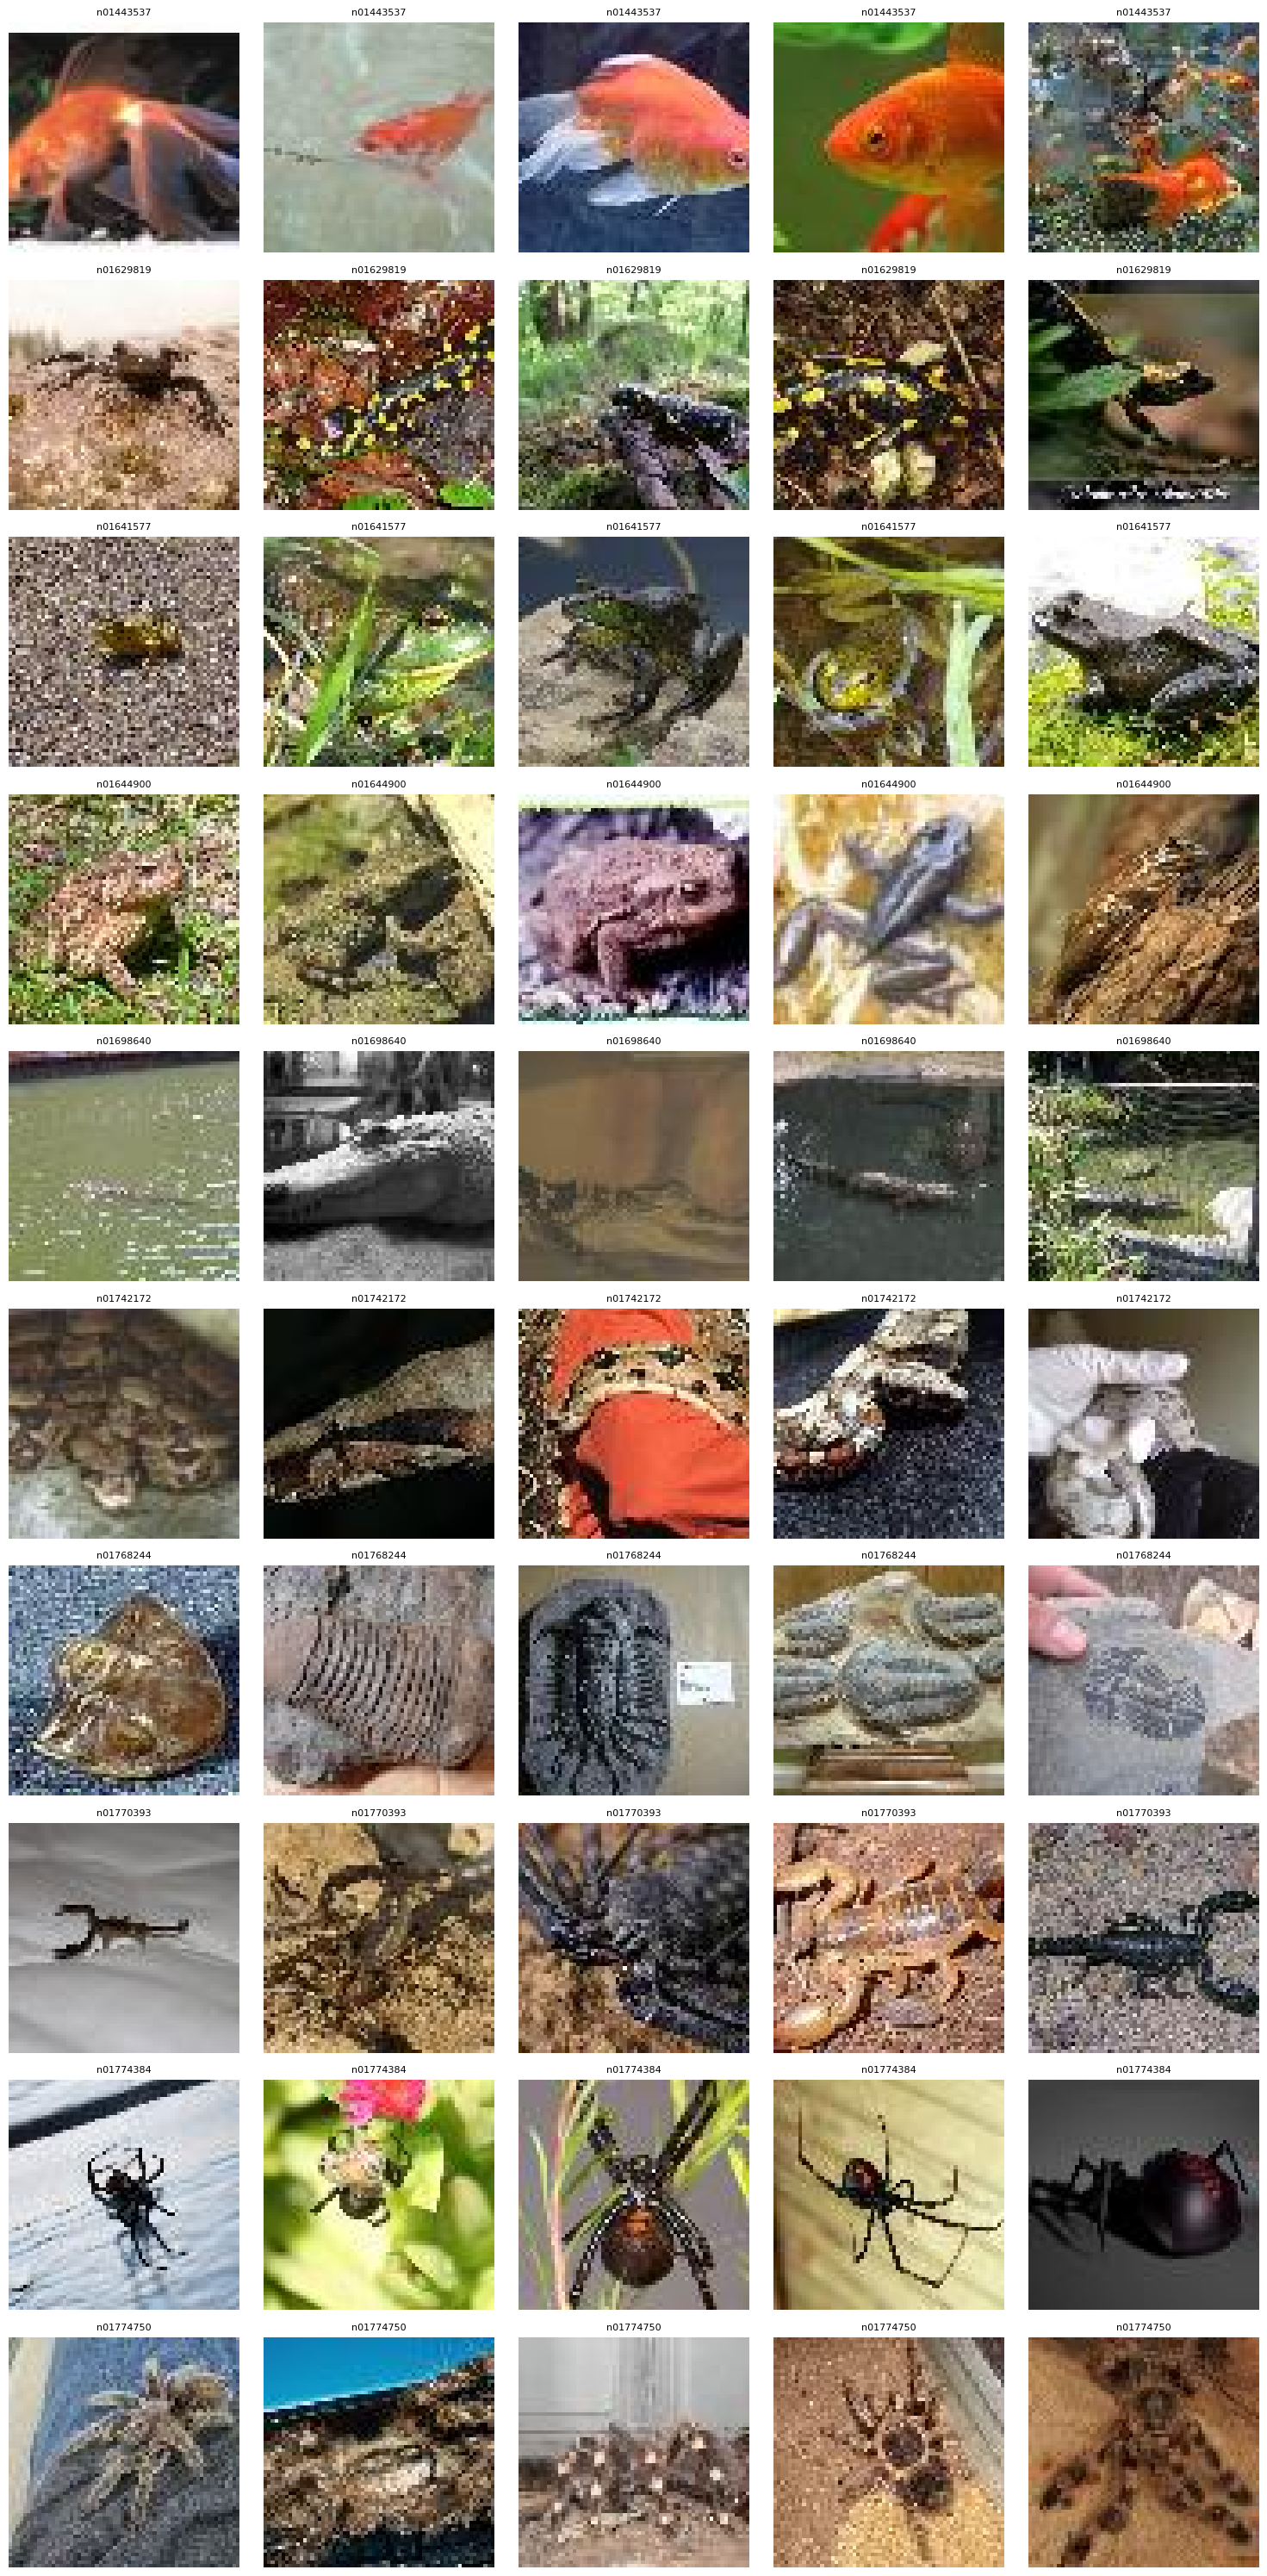

In [5]:
from utils import InspectImage

words_file = "./tiny-imagenet-200/words.txt"

# Create inspector for train dataset
val_inspector = InspectImage(val_loader.dataset, words_file=words_file)
val_inspector.inspect_loader(loader_name="Validation Loader")
val_inspector.show_images_per_class(num_classes=10, images_per_class=5, loader_name="Validation Loader")